In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, explained_variance_score, mean_absolute_error, mean_squared_error
%matplotlib inline 

# MLL Results

In [3]:
path_new = '~/sims_n_results/simupdates_aug2020/'
path_fix = '~/sims_n_results/oldtset3_fixmat_sep2020/'
path_old = '~/sims_n_results/nucmoles_opusupdate_aug2019/'
uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]
mll = {}
for i, unc_job in enumerate(job_dirs):
    key = '_unc' + str(i)
    mll['1' + key] = pd.read_csv(path_new + 'train15/' + unc_job + '/' + unc_job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
    mll['2' + key] = pd.read_csv(path_fix + 'mll_train15/' + unc_job + '/' + unc_job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
    mll['3' + key] = pd.read_csv(path_old + 'tamuNoRatio/' + unc_job + '/' + unc_job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [4]:
rxtr_mll = {}
burn_mll = {}
enri_mll = {}
cool_mll = {}
for i in ['1', '2', '3']:
    rxtr = []
    burn = []
    enri = []
    cool = []
    for j, unc_job in enumerate(uncs):
        key = i + '_unc' + str(j)
        rxtr.append(accuracy_score(mll[key]['ReactorType'], mll[key]['pred_ReactorType']))
        burn.append(explained_variance_score(mll[key]['Burnup'], mll[key]['pred_Burnup']))
        enri.append(explained_variance_score(mll[key]['Enrichment'], mll[key]['pred_Enrichment']))
        cool.append(explained_variance_score(mll[key]['CoolingTime'], mll[key]['pred_CoolingTime']))
    rxtr_mll[i] = rxtr
    burn_mll[i] = burn
    enri_mll[i] = enri
    cool_mll[i] = cool

# Plotting

In [5]:
# color dict (use: colors['XColor'])
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

In [6]:
path = '~/sims_n_results/'
learn_path1 = path + 'simupdates_aug2020/learn15/rand_err/'
learn_path2 = path + 'oldtset3_fixmat_sep2020/randerr/'
learn_path3 = path + 'old_learnme_results/19jan2020_15nuc/'
csv_end = '_nuc15_random_error.csv'
frac = '1.0'
burn_knn = {}
burn_dtr = {}
rxtr_knn = {}
rxtr_dtr = {}
enri_knn = {}
enri_dtr = {}
cool_knn = {}
cool_dtr = {}
for i, lpath in enumerate([learn_path1, learn_path2, learn_path3]):
    if i+1 == 3:
        burn = pd.read_csv(lpath + '15nuc_m60_scale-last_burnup_random-error.csv').drop(columns='Unnamed: 0')
        burn_knn[str(i+1)] = burn[['Percent Error', 'kNN Score', 'kNN Std']]
        burn_dtr[str(i+1)] = burn[['Percent Error', 'DTree Score', 'DTree Std']]
        rxtr = pd.read_csv(lpath + '15nuc_m60_scale-last_reactor_random-error.csv').drop(columns='Unnamed: 0')
        rxtr_knn[str(i+1)] = rxtr[['Percent Error', 'kNN Score', 'kNN Std']]
        rxtr_dtr[str(i+1)] = rxtr[['Percent Error', 'DTree Score', 'DTree Std']]
        cool = pd.read_csv(lpath + '15nuc_m60_scale-last_cooling_random-error.csv').drop(columns='Unnamed: 0')
        cool_knn[str(i+1)] = cool[['Percent Error', 'kNN Score', 'kNN Std']]
        cool_dtr[str(i+1)] = cool[['Percent Error', 'DTree Score', 'DTree Std']]
    else:
        burn_knn[str(i+1)] = pd.read_csv(lpath + 'burnup_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
        burn_dtr[str(i+1)] = pd.read_csv(lpath + 'burnup_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')
        rxtr_knn[str(i+1)] = pd.read_csv(lpath + 'reactor_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
        rxtr_dtr[str(i+1)] = pd.read_csv(lpath + 'reactor_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')
        enri_knn[str(i+1)] = pd.read_csv(lpath + 'enrichment_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
        enri_dtr[str(i+1)] = pd.read_csv(lpath + 'enrichment_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')
        cool_knn[str(i+1)] = pd.read_csv(lpath + 'cooling_knn_tset' + frac + csv_end).drop(columns='Unnamed: 0')
        cool_dtr[str(i+1)] = pd.read_csv(lpath + 'cooling_dtree_tset' + frac + csv_end).drop(columns='Unnamed: 0')

In [11]:
def plot_scorecurves(title): 
    plt.clf()    
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)   
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Percent Error', fontsize=20, labelpad=15)
    ax.set_ylabel('Score', fontsize=20, labelpad=15)
    
    sv_base = '../plots/oldvnew_randerr_nuc15'
    knn_scr = 'kNN ExpVar'
    dtr_scr = 'DTree ExpVar'
    knn_std = 'kNN ExpVar Std'
    dtr_std = 'DTree ExpVar Std'
    if 'Reactor' in title:
        knn = rxtr_knn
        dtr = rxtr_dtr
        mll = rxtr_mll
        knn_scr = 'kNN Acc'
        dtr_scr = 'DTree Acc'
        knn_std = 'kNN Acc Std'
        dtr_std = 'DTree Acc Std'
        sv_fig = sv_base + 'rxtr.png'
    elif 'Burnup' in title:
        knn = burn_knn
        dtr = burn_dtr
        mll = burn_mll
        sv_fig = sv_base + 'burn.png'
    elif 'Enrichment' in title:
        knn = enri_knn
        dtr = enri_dtr
        mll = enri_mll
        sv_fig = sv_base + 'enri.png'
    else:
        knn = cool_knn
        dtr = cool_dtr
        mll = cool_mll
        sv_fig = sv_base + 'cool.png'
    
    ## Scikit Results
    err = burn_knn['1']['Percent Error']
    hue = {'1' : 'D', '2' : 'M', '3' : 'L'}
    for i in ['1', '2', '3']:
        if i == '3':
            knn_scr = 'kNN Score'
            dtr_scr = 'DTree Score'
            knn_std = 'kNN Std'
            dtr_std = 'DTree Std'
            if 'Enrichment' not in title:
                err = burn_knn['3']['Percent Error']
                ax.fill_between(err, knn[i][knn_scr] - knn[i][knn_std], knn[i][knn_scr] + knn[i][knn_std], color = colors[hue[i]+'Brwn'], alpha=0.2)
                ax.fill_between(err, dtr[i][dtr_scr] - dtr[i][dtr_std], dtr[i][dtr_scr] + dtr[i][dtr_std], color = colors[hue[i]+'Teal'], alpha=0.2)
                ax.plot(err, knn[i][knn_scr], 'o-', color=colors[hue[i]+'Brwn'], mew=0, ms=5, label='kNN_old')
                ax.plot(err, dtr[i][dtr_scr], 'o-', color=colors[hue[i]+'Teal'], mew=0, ms=5, label='DTree_old')
        elif i == '1':
            ax.fill_between(err, knn[i][knn_scr] - knn[i][knn_std], knn[i][knn_scr] + knn[i][knn_std], color = colors[hue[i]+'Brwn'], alpha=0.2)
            ax.fill_between(err, dtr[i][dtr_scr] - dtr[i][dtr_std], dtr[i][dtr_scr] + dtr[i][dtr_std], color = colors[hue[i]+'Teal'], alpha=0.2)
            ax.plot(err, knn[i][knn_scr], 'o-', color=colors[hue[i]+'Brwn'], mew=0, ms=5, label='kNN_new')
            ax.plot(err, dtr[i][dtr_scr], 'o-', color=colors[hue[i]+'Teal'], mew=0, ms=5, label='DTree_new')
        else:
            ax.fill_between(err, knn[i][knn_scr] - knn[i][knn_std], knn[i][knn_scr] + knn[i][knn_std], color = colors[hue[i]+'Brwn'], alpha=0.2)
            ax.fill_between(err, dtr[i][dtr_scr] - dtr[i][dtr_std], dtr[i][dtr_scr] + dtr[i][dtr_std], color = colors[hue[i]+'Teal'], alpha=0.2)
            ax.plot(err, knn[i][knn_scr], 'o-', color=colors[hue[i]+'Brwn'], mew=0, ms=5, label='kNN_fix')
            ax.plot(err, dtr[i][dtr_scr], 'o-', color=colors[hue[i]+'Teal'], mew=0, ms=5, label='DTree_fix')
    
    ## MLL Results
    unc = [100*x for x in uncs]
    ax.plot(unc, mll['1'], 'o-', color=colors['DPurp'], mew=0, ms=5, label='MLL_new')
    ax.plot(unc, mll['2'], 'o-', color=colors['MPurp'], mew=0, ms=5, label='MLL_fix')
    ax.plot(unc, mll['3'], 'o-', color=colors['LPurp'], mew=0, ms=5, label='MLL_old')
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')
    plt.show()
    
    fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

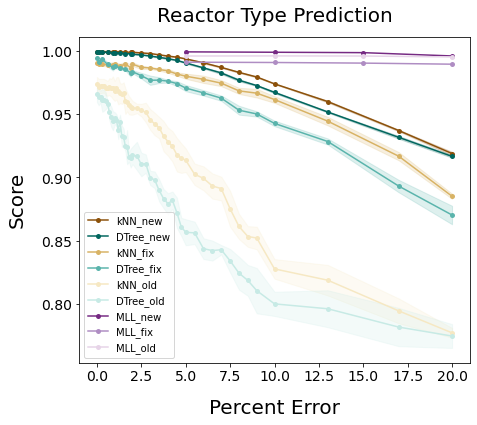

<Figure size 432x288 with 0 Axes>

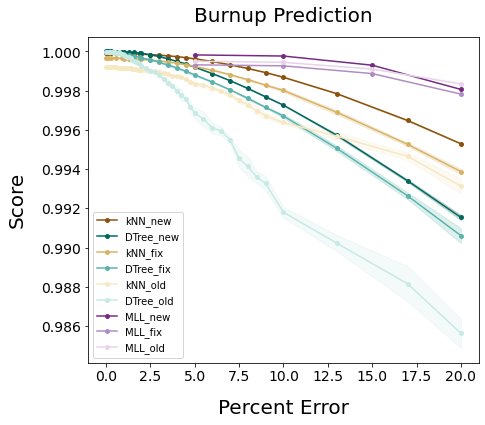

<Figure size 432x288 with 0 Axes>

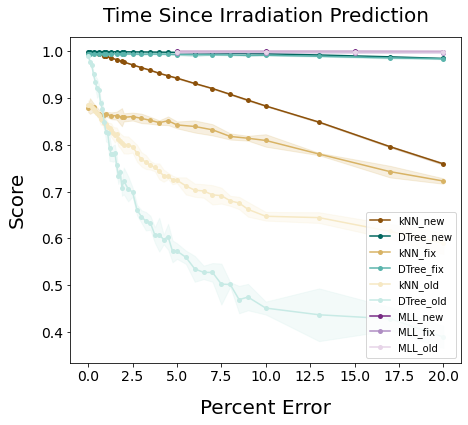

<Figure size 432x288 with 0 Axes>

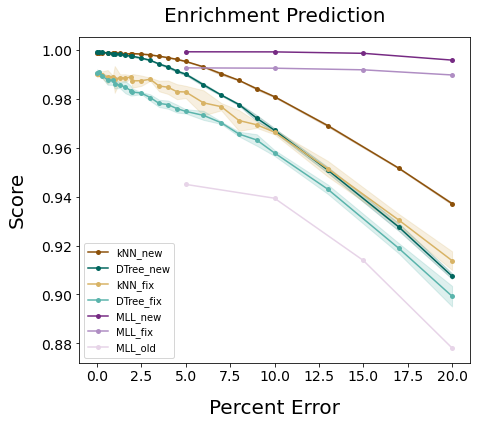

In [12]:
plot_scorecurves('Reactor Type Prediction')
plot_scorecurves('Burnup Prediction')
plot_scorecurves('Time Since Irradiation Prediction')
plot_scorecurves('Enrichment Prediction')